In [1]:
import matplotlib.pyplot as plt
import numpy as np

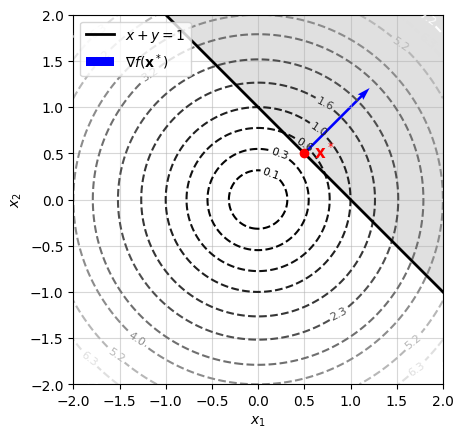

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Objective function: f(x, y) = x^2 + y^2
Z = X1**2 + X2**2

# Constraint: x + y >= 1 → feasible region is where x + y - 1 >= 0
constraint = X1 + X2 >= 1

# Levels for contour plot with finer granularity near the optimum
levels = np.array([0.1, 0.3, 0.6, 1.0, 1.6, 2.3, 3.2, 4.0, 5.2, 6.3, 7.2])

# Plot setup
fig, ax = plt.subplots()

# Plot contour lines of the objective function
contours = ax.contour(X1, X2, Z, levels=levels, linestyles='dashed', cmap='gray')
ax.clabel(contours, inline=True, fontsize=8)

# Shade the feasible region
ax.contourf(X1, X2, constraint, levels=[0.5, 1], colors=['lightgray'], alpha=0.7)

# Constraint boundary line: x + y = 1
x_vals = np.linspace(-2, 2, 400)
y_vals = 1 - x_vals
ax.plot(x_vals, y_vals, 'k-', linewidth=2, label=r'$x + y = 1$')

# Mark the optimal point
x_opt, y_opt = 0.5, 0.5
ax.plot(x_opt, y_opt, 'ro')  # red dot
ax.annotate(r'$\mathbf{x}^*$', (x_opt + 0.1, y_opt - 0.05), color='red', fontsize=12)

# Draw gradient vector of f at optimal point (∇f = (2x, 2y))
grad_f = np.array([2 * x_opt, 2 * y_opt])
grad_f = grad_f / np.linalg.norm(grad_f)
ax.quiver(x_opt, y_opt, grad_f[0], grad_f[1],
          angles='xy', scale_units='xy', scale=1, color='blue', width=0.007, label=r'$\nabla f(\mathbf{x}^*)$')

# Axes, labels, and layout
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')
ax.legend(loc='upper left')
ax.grid(alpha=0.5)

plt.savefig('figures/constrained_optimization.pdf')